In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

<h3>Velocities that FLCT retrevies from LW intensity at 500nm</h3>

In [3]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_500nmInte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_500nmInte_tracked.fits")[1].data

In [4]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_500nmInte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_500nmInte_tracked.fits")[1].data

<h3>Simulation velocities</h3>

In [5]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx[::3]
Vy = Vy[::3]
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [6]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [7]:
np.shape(Vx_600)

(29, 1536, 1536)

In [8]:
Vx_mean_sim29 = temporal_avg(Vx, 0, 29)
Vx_mean_sim29 = Vx_mean_sim29/1E5

Vy_mean_sim29 = temporal_avg(Vy, 0, 29)
Vy_mean_sim29 = Vy_mean_sim29/1E5

In [9]:
from scipy.stats import pearsonr

In [10]:
from scipy.ndimage import gaussian_filter

In [11]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim29, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim29, 22.5, mode = "wrap")

In [12]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim29, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim29, 11.25, mode = "wrap")

In [13]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 29)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 29)

In [14]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 29)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 29)

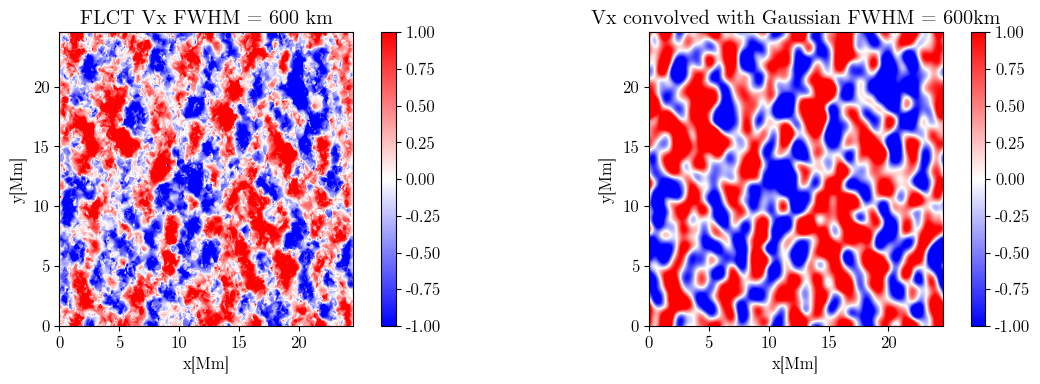

In [15]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx FWHM = 600 km") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("Vx convolved with Gaussian FWHM = 600km") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_500nm_600km", bbox_inches = 'tight', dpi = 75)

In [16]:
r_x1_600 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_x1_600)

PearsonRResult(statistic=0.08347184175867568, pvalue=0.0)


In [17]:
r_x2_600 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim29.flatten())
print(r_x2_600)

PearsonRResult(statistic=0.24138222633035605, pvalue=0.0)


In [18]:
r_x3_600 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_x3_600)

PearsonRResult(statistic=0.27480817137089897, pvalue=0.0)


In [19]:
r_y1_600 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_y1_600)

PearsonRResult(statistic=0.037499076450409494, pvalue=0.0)


In [20]:
r_y2_600 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim29.flatten())
print(r_y2_600)

PearsonRResult(statistic=0.44894713752234383, pvalue=0.0)


In [21]:
r_y3_600 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_y3_600)

PearsonRResult(statistic=0.5142211171690831, pvalue=0.0)


In [22]:
print(Vx_FLCT_600)

[[ 0.08850652  0.08924866  0.08952015 ...  0.00359312 -0.00060503
  -0.01081742]
 [ 0.20283633  0.20378672  0.2043199  ...  0.01621731  0.01057132
   0.00187953]
 [ 0.20335071  0.20430753  0.20485944 ...  0.02523525  0.02070785
   0.0103393 ]
 ...
 [-0.1389758   0.19321715  0.1958745  ... -0.04374033 -0.05733428
   0.22467392]
 [-0.14196813  0.19295466  0.1953967  ... -0.08594206 -0.09697565
   0.18744064]
 [-0.14493506  0.19200326  0.19435593 ... -0.08227583 -0.09432643
   0.18968419]]


In [23]:
print(Vx_filtered22)

[[1.011087   0.97255456 0.9332917  ... 1.1207544  1.085336   1.0487314 ]
 [1.0264456  0.9879262  0.9486578  ... 1.1359724  1.100617   1.0640596 ]
 [1.0414723  1.0029638  0.9636881  ... 1.1508641  1.1155698  1.0790578 ]
 ...
 [0.9633154  0.9247306  0.8854696  ... 1.0734433  1.0378234  1.0010645 ]
 [0.9794907  0.9409259  0.90166694 ... 1.0894585  1.0539079  1.0172026 ]
 [0.99542516 0.95687777 0.9176181  ... 1.1052395  1.069756   1.0331023 ]]


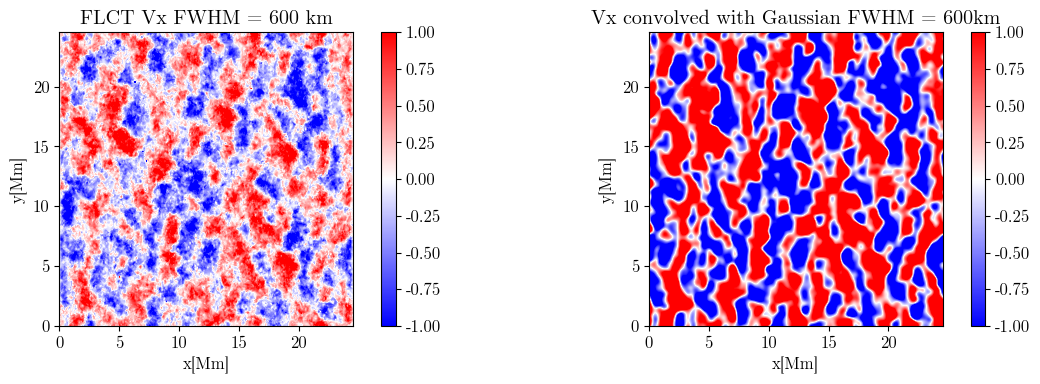

In [24]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx FWHM = 600 km") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered11[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("Vx convolved with Gaussian FWHM = 600km") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_500nm_300km", bbox_inches = 'tight', dpi = 75)

In [25]:
r_x1_300 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_x1_300)

PearsonRResult(statistic=-0.00035072005038796984, pvalue=0.5900899203612314)


In [26]:
r_x2_300 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim29.flatten())
print(r_x2_300)

PearsonRResult(statistic=0.10885560465779112, pvalue=0.0)


In [27]:
r_x3_300 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered11.flatten())
print(r_x3_300)

PearsonRResult(statistic=0.11855602937067648, pvalue=0.0)


In [28]:
r_y1_300 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_y1_300)

PearsonRResult(statistic=-0.010059671156903684, pvalue=7.309565480043097e-54)


In [29]:
r_y2_300 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim29.flatten())
print(r_y2_300)

PearsonRResult(statistic=0.5258266733922499, pvalue=0.0)


In [30]:
r_y3_300 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered11.flatten())
print(r_y3_300)

PearsonRResult(statistic=0.5716604440393147, pvalue=0.0)


<h2>12. 11. 2024.</h2>

<h3>FLCT velocities, result from tracking on Matthias's intensity</h3>

In [31]:
Vx_300Inte = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300Inte = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [32]:
Vx_FLCT_300Inte = temporal_avg(Vx_300Inte, 0, 29)
Vy_FLCT_300Inte = temporal_avg(Vy_300Inte, 0, 29)

<h4>Velocities, LW at 500nm vs. Intensity from sim as tracked parameter </h4>

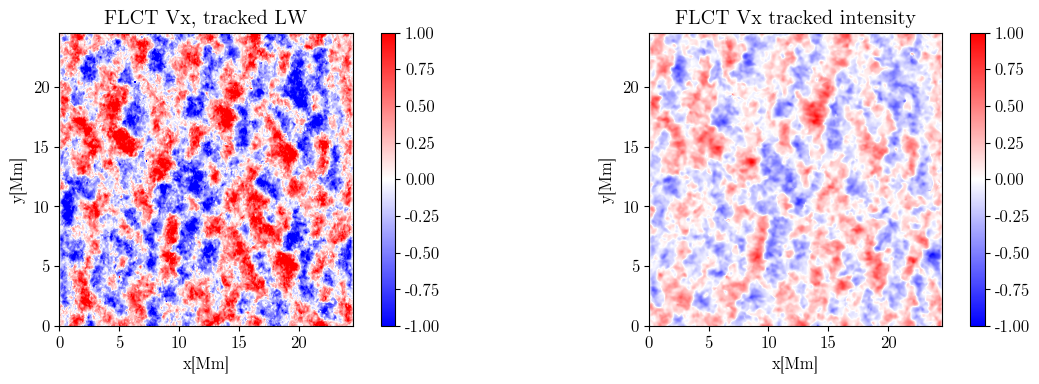

In [33]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx, tracked LW") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_FLCT_300Inte[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("FLCT Vx tracked intensity") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_N500nm_300km", bbox_inches = 'tight', dpi = 75)

In [34]:
r = pearsonr(Vx_FLCT_300.flatten(), Vx_FLCT_300Inte.flatten())
print(r)

PearsonRResult(statistic=0.10247762509417815, pvalue=0.0)


In [35]:
Vx_600Inte = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600Inte = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [36]:
Vx_FLCT_600Inte = temporal_avg(Vx_600Inte, 0, 29)
Vy_FLCT_600Inte = temporal_avg(Vy_600Inte, 0, 29)

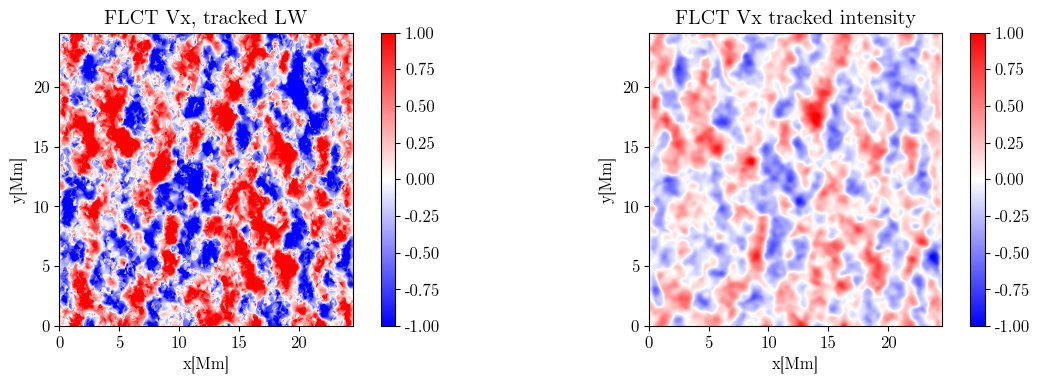

In [37]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx, tracked LW") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_FLCT_600Inte[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("FLCT Vx tracked intensity") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_N500nm_600km", bbox_inches = 'tight', dpi = 75)

In [38]:
r = pearsonr(Vx_FLCT_600.flatten(), Vx_FLCT_600Inte.flatten())
print(r)

PearsonRResult(statistic=0.24427162096629162, pvalue=0.0)


In [39]:
r = pearsonr(Vy_FLCT_600.flatten(), Vy_FLCT_600Inte.flatten())
print(r)

PearsonRResult(statistic=0.4590163065248625, pvalue=0.0)


<h3>FLCT velocities, every third snapshot taken (150th step) vs. LW intensity at 500nm</h3>

In [40]:
Vx_300Inte3 = fits.open("pyFLCT_fwhm_300_dt_30_Inte%3_tracked.fits")[0].data
Vy_300Inte3 = fits.open("pyFLCT_fwhm_300_dt_30_Inte%3_tracked.fits")[1].data

In [41]:
Vx_FLCT_300Inte3 = temporal_avg(Vx_300Inte3, 0, 29)
Vy_FLCT_300Inte3 = temporal_avg(Vy_300Inte3, 0, 29)

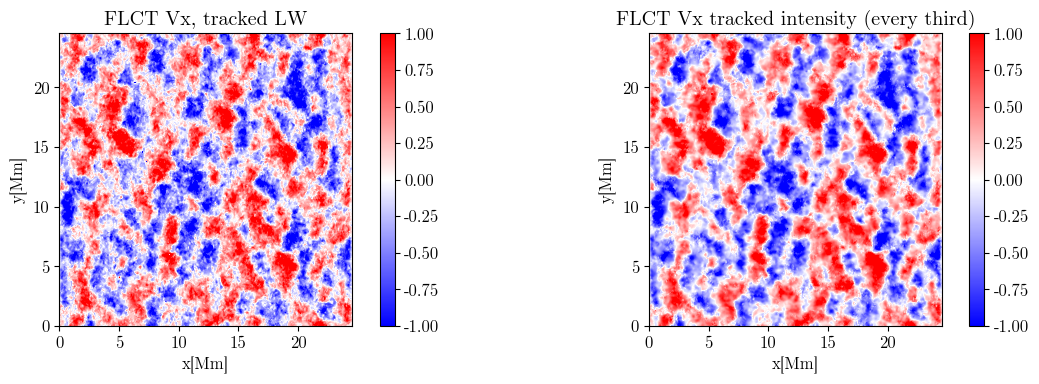

In [42]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_FLCT_300[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax = 1)
ax1.set_title("FLCT Vx, tracked LW") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_FLCT_300Inte3[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -1, vmax =1)
ax2.set_title("FLCT Vx tracked intensity (every third)") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("FLCT_N500nm_300km3", bbox_inches = 'tight', dpi = 75)

In [43]:
r = pearsonr(Vx_FLCT_300.flatten(), Vx_FLCT_300Inte3.flatten())
print(r)

PearsonRResult(statistic=0.12068451594144261, pvalue=0.0)


Text(0, 0.5, "Tracking on Mattias's intensity")

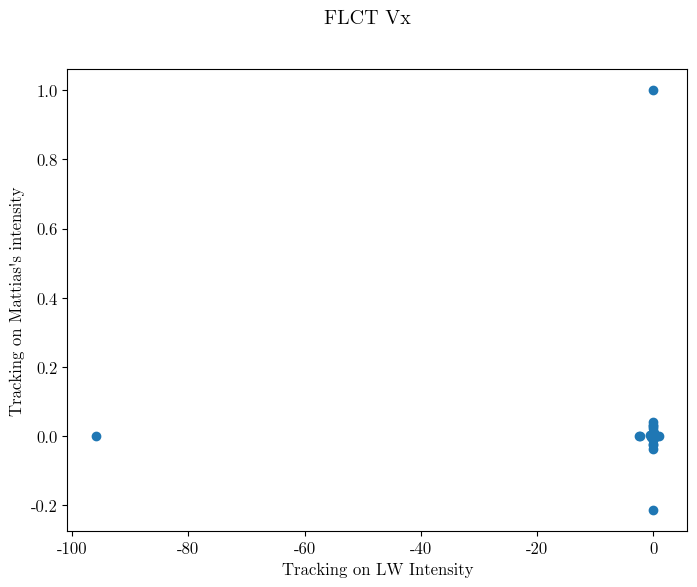

In [44]:
fig = plt.figure(figsize = (8,6))
plt.suptitle("FLCT Vx")
plt.scatter(Vx_FLCT_300.flatten()/np.max(Vx_FLCT_300.flatten()), Vx_FLCT_300Inte3.flatten()/np.max(Vx_FLCT_300Inte3.flatten()))
plt.xlabel("Tracking on LW Intensity")
plt.ylabel("Tracking on Mattias's intensity")
#plt.show()
#plt.savefig("TempInte.png", dpi = 300)